In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
from argovisHelpers import helpers as avh
import pandas as pd
import numpy as np

from Argovis_tasks_helpers import map_lons_lats
#import helpers
    
API_KEY=''
API_PREFIX = 'https://argovis-api.colorado.edu/'


### Load the track and plot the points on a map

In [2]:
df = pd.read_csv('test_points.csv')


In [3]:
def find_sign(str_EWNS):
    if str_EWNS=="E" or str_EWNS=="N":
        sign = 1
    elif str_EWNS=="W" or str_EWNS=="S":
        sign = -1
    else:
        print('Check wrong format')
    return sign

In [4]:
longitude_after_conversion = []
latitude_after_conversion = []

for ix,iy in zip(df['Longitude'],df['Latitude']):
    longitude_after_conversion.append(find_sign(str_EWNS=ix.split(' ')[2])*(float(ix.split(' ')[0][0:-1])+float(ix.split(' ')[1][0:-1])/60))
    latitude_after_conversion.append(find_sign(str_EWNS=iy.split(' ')[2])*(float(iy.split(' ')[0][0:-1])+float(iy.split(' ')[1][0:-1])/60))
    

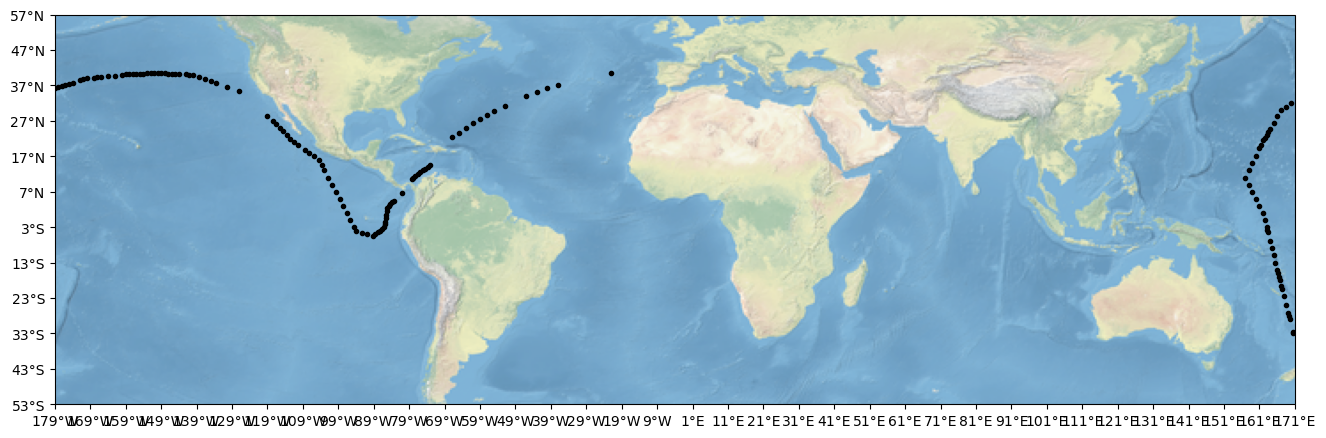

In [9]:
map_lons_lats(lons=longitude_after_conversion,lats=latitude_after_conversion,dx=20,dy=20,fig_sz1=16,fig_sz2=9)

#### Get profiles near the track

For now we set `radius_km = 100` km and the time period as in the next cell. This will result in potentially bringing back the same profiles for more points on the track... as well as bringing back multiple profiles from the same float... since we are interested in a float count, later we will look at the number of unique platform numbers.

In [ ]:
lons = longitude_after_conversion #[-170]
lats = latitude_after_conversion #[35]
time_period = ['2024-02-01T00:00:00.000Z', '2024-07-01T00:00:00.000Z']
# dates= ['2024-06-26T15:01:53.000Z']

radius_km = 100
# delta_days= 10

In [6]:
argo = []

for i,ix in enumerate(lons):
    colo_argo = {
        'center': str(ix) + ',' + str(lats[i]),
        'radius': radius_km,
        'startDate': time_period[0],
        'endDate': time_period[1],
        # 'startDate': (datetime.strptime(dates[i], "%Y-%m-%dT%H:%M:%S.%fZ") + timedelta(days=-delta_days)).strftime("%Y-%m-%dT%H:%M:%SZ"),
        # 'endDate': (datetime.strptime(dates[i], "%Y-%m-%dT%H:%M:%S.%fZ") + timedelta(days=delta_days)).strftime("%Y-%m-%dT%H:%M:%SZ"),
        #'data': 'temperature,salinity' # uncomment here if interested in getting the data
    }
    p = avh.query('argo', options=colo_argo, apikey=API_KEY, apiroot=API_PREFIX)

    if len(p) == 0:
        argo.append(None)
    else:
        print('Profile found adjacent to', str(ix), str(lats[i]))
        argo.append(p)

Profile found adjacent to -22.0 40.6
Profile found adjacent to -37.0 37.1
Profile found adjacent to -40.0 36.2
Profile found adjacent to -43.0 35.1
Profile found adjacent to -46.0 33.9
Profile found adjacent to -52.0 31.2
Profile found adjacent to -55.0 29.8
Profile found adjacent to -57.0 28.7
Profile found adjacent to -59.0 27.6
Profile found adjacent to -61.0 26.35
Profile found adjacent to -63.0 25.1
Profile found adjacent to -65.0 23.7
Profile found adjacent to -67.0 22.5
Profile found adjacent to -73.1 14.5
Profile found adjacent to -73.8 14.0
Profile found adjacent to -74.5 13.5
Profile found adjacent to -75.2 13.0
Profile found adjacent to -75.9 12.45
Profile found adjacent to -76.6 11.9
Profile found adjacent to -77.3 11.4
Profile found adjacent to -77.8 11.0
Profile found adjacent to -78.2 10.7
Profile found adjacent to -81.0 6.6
Profile found adjacent to -83.4 4.5
Profile found adjacent to -83.85 4.0
Profile found adjacent to -84.3 3.5
Profile found adjacent to -84.75 3.0
Pr

In [7]:
len(argo)

153

In [76]:
profiles     = []
profiles_wmo = []
profiles_datetime= []
profiles_lons= []
profiles_lats= []

profiles_bgc     = []
profiles_bgc_wmo = []
profiles_bgc_datetime= []
profiles_bgc_lons= []
profiles_bgc_lats= []

for i_i,i in enumerate(argo):
    if i:
        # print('-->',str(i_i))
        for ii_i,ii in enumerate(i):
            # print(str(ii_i))
            profiles.append(ii)
            profiles_wmo.append(int(ii['_id'].split('_')[0]))
            profiles_datetime.append(datetime.strptime(ii['timestamp'], "%Y-%m-%dT%H:%M:%S.%fZ"))
            profiles_lons.append(ii['geolocation']['coordinates'][0])
            profiles_lats.append(ii['geolocation']['coordinates'][1])
            
            for j in ii['source']:
                if 'argo_bgc' in j['source']:
                    profiles_bgc.append(ii)
                    profiles_bgc_wmo.append(int(ii['_id'].split('_')[0]))
                    profiles_bgc_datetime.append(datetime.strptime(ii['timestamp'], "%Y-%m-%dT%H:%M:%S.%fZ"))
                    profiles_bgc_lons.append(ii['geolocation']['coordinates'][0])
                    profiles_bgc_lats.append(ii['geolocation']['coordinates'][1])
                

In [77]:
len(profiles)

1416

In [70]:
len(profiles_bgc)

59

In [71]:
len(np.unique(profiles_wmo))

146

In [72]:
len(np.unique(profiles_bgc_wmo))

10

In [43]:
min(profiles_datetime)

datetime.datetime(2024, 2, 1, 2, 18, 27)

In [44]:
max(profiles_datetime)

datetime.datetime(2024, 6, 30, 21, 58, 25, 2000)

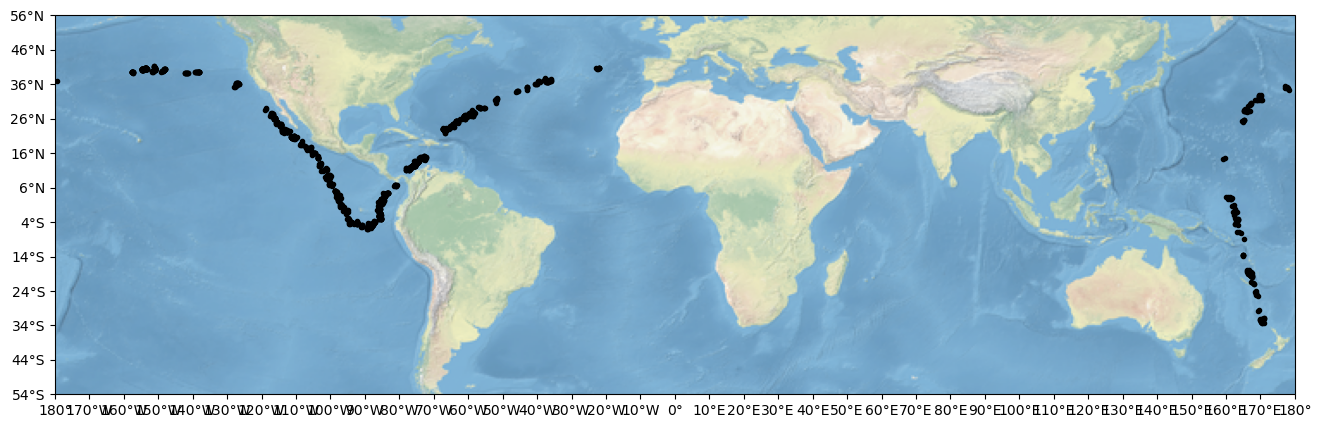

In [78]:
map_lons_lats(lons=profiles_lons,lats=profiles_lats,dx=20,dy=20,fig_sz1=16,fig_sz2=9)

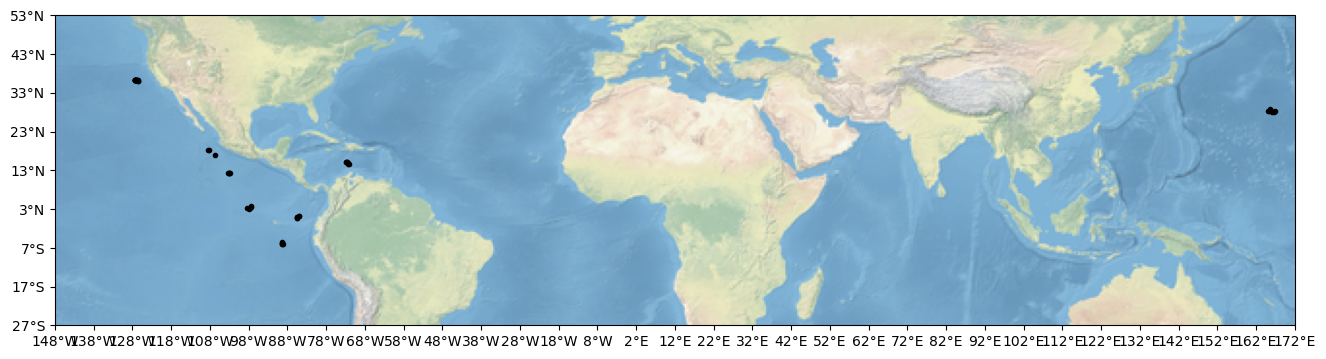

In [79]:
map_lons_lats(lons=profiles_bgc_lons,lats=profiles_bgc_lats,dx=20,dy=20,fig_sz1=16,fig_sz2=9)